In [15]:
# import packages
import os
import numpy as np
import xarray as xr
import pandas as pd
import geopandas as gpd

# plotting
try:
    import matplotlib.pyplot as plt
    import cartopy.crs as ccrs
except:
    print('plotting packages not installed!')

In [16]:
# define path to CMIP6 data
datadir = '/home/steidani/hackathon/2021_ai_climate/data/MCD64A1/'

In [21]:
# load table
v = pd.read_hdf(datadir + "2019_Oceania.h5", 'v')

In [51]:
v

,index,lat,lon,x,y,H,V,i,j,dtime,conf,maxFRP,satellite,neigh,t,country,continent,neigh_int,gl,cp
0,172505569,-34.120833,115.947037,33118,14894,27,12,494,718,2019-01-01,8,48,both,non-fire land pixel,6209,Australia,Oceania,5,33079706,15377662
1,172505570,-34.129167,115.948399,33117,14895,27,12,495,717,2019-01-01,8,52,both,non-fire land pixel,6209,Australia,Oceania,5,33078108,15377662
2,172505571,-34.137500,115.949764,33116,14896,27,12,496,716,2019-01-01,8,52,both,non-fire land pixel,6209,Australia,Oceania,5,33076508,15377662
3,172505572,-34.529167,116.644125,33131,14943,27,12,543,731,2019-01-01,7,431,both,non-fire land pixel,6209,Australia,Oceania,5,33101505,4823103
4,172505573,-34.529167,116.654240,33132,14943,27,12,543,732,2019-01-01,7,431,both,non-fire water pixel,6209,Australia,Oceania,4,33103222,4823103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960008,182173659,-18.404167,145.320183,38146,13008,31,10,1008,946,2019-12-31,8,218,both,non-fire land pixel,6573,New Zealand,Oceania,5,39042495,58097
960009,182173660,-18.404167,145.328966,38147,13008,31,10,1008,947,2019-12-31,8,218,both,non-fire land pixel,6573,New Zealand,Oceania,5,39043749,58097
960010,182173661,-18.412500,145.186691,38130,13009,31,10,1009,930,2019-12-31,7,267,both,non-fire land pixel,6573,New Zealand,Oceania,5,39023714,58097
960011,182173662,-18.412500,145.195474,38131,13009,31,10,1009,931,2019-12-31,7,267,both,non-fire land pixel,6573,New Zealand,Oceania,5,39024858,58097


In [119]:
count = v.groupby(['H','V']).size().reset_index(name='counts')
loc = v.groupby(['H','V']).mean().reset_index()

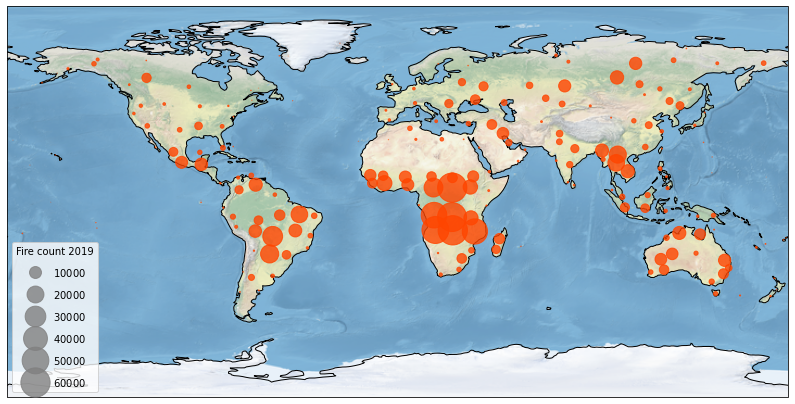

In [118]:
# plot location of fires

f, ax = plt.subplots(1, 1, figsize=(14,11), subplot_kw=dict(projection=ccrs.PlateCarree()))
ax.stock_img()
ax.coastlines()
ax.scatter(loc['lon'],loc['lat'],s=count.counts/70, c='orangered',zorder=5, alpha=0.8)

#for i, txt in enumerate(count.counts):
#    ax.annotate(txt, (loc['lon'][i], loc['lat'][i]),zorder=10)

    # produce a legend with a cross section of sizes from the scatter
handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)
legend1 = ax.legend(handles, labels*70, loc="upper right", title="Sizes")


kw = dict(prop="sizes", num=5, color='gray',
          func=lambda s: s*70)
legend2 = ax.legend(*scatter.legend_elements(**kw), labelspacing=1,
                    loc="lower left", title="Fire count 2019")

plt.savefig('fire_count_2019.png',bbox_inches='tight')

In [120]:
np.unique(v.lat)

array([-48.74583333, -48.7375    , -46.1625    , ...,  72.17083333,
        72.17916666,  73.64583333])